# 입문자를 위한, 파이썬/R 데이터 분석 

]

## Today's mission

- Iris(붓꽃) Dataset을 활용한 DecisionTree
- DecisionTree 모델 시각화(Visualization) - I
- Graphviz 적용: 설치방법 소개
- 모델링 관련 내용 : DecisionTree Hyperparameter, Feature 선택 중요도 정보, DecisionTree Overfitting, Variance vs Bias
- Decision Tree 모델 시각화(Visualization) - II


]

## Iris(붓꽃) Dataset을 활용한 DecisionTree 

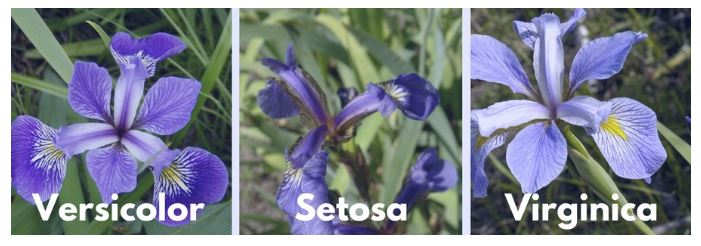
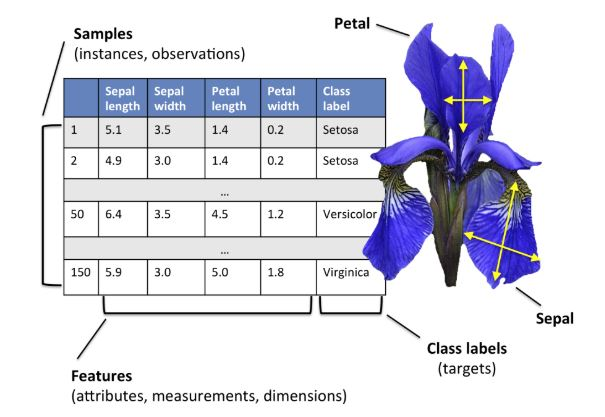

#### iris dataset 로딩 :

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### iris dataset 전처리 :

In [38]:
import pandas as pd

In [39]:
iris = load_iris()
iris
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [40]:
len(iris.data)

150

In [41]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
iris.values()

dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

In [43]:
# iris dataset에서 feature 해당하는 데이터
print(iris.feature_names)      # feature 데이터에 대한 설명(이름)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [44]:
# iris dataset에서 label 해당하는 데이터
print(iris.target)
print(iris.target_names)       # label 데이터에 대한 설명(이름)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [45]:
# iris dataset 가독성을 위한 DataFrame 작업 :
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# iris dataset 중, feature에 대한 Label 정보 연결
df_iris['label'] = iris.target
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### iris dataset 분리 작업: train 데이터와 test 데이터 분리 :

In [46]:
# 로딩한 Iris data 학습train과 테스트test 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2,           # train:test = 80:20
                                                    random_state=11)         # 예컨대, seed번호: 11번

In [47]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

# print(X_train)
# print(y_train)
#print(X_test)
#print(y_test)

120 120
30 30


#### train 데이터로 학습(Fit) 수행 :

In [56]:
# 분류알고리즘 객체 DecisionTree Classifier 생성:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)                             # 예컨대, seed번호: 156번 

In [49]:
# 분류알고리즘 객체 DecisionTree Classifier 생성:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=None)                             # 예컨대, seed번호: 156번 

In [57]:
# DecisionTreeClassifer 학습 수행:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

## DecisionTree 모델 시각화(Visualization) - I

#### Graphviz 적용: 설치방법 소개

https://pypi.org/project/graphviz/

https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224

https://zephyrus1111.tistory.com/123

In [51]:
import os
os.environ['PATH'] = os.environ['PATH'] + os.pathsep + 'C:\ProgramData\Anaconda3\Library\bin'

In [58]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 dtree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="data/dtree.dot", class_names=iris.target_names , feature_names = iris.feature_names, impurity=True, filled=True)

In [53]:
#!pip install graphviz

In [59]:
import graphviz

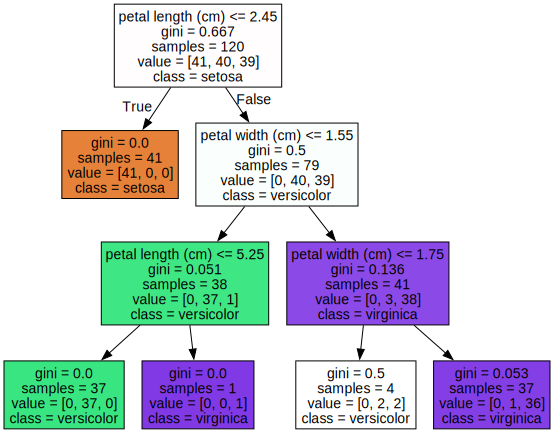

In [60]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("data/dtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Graphviz 해석 예:

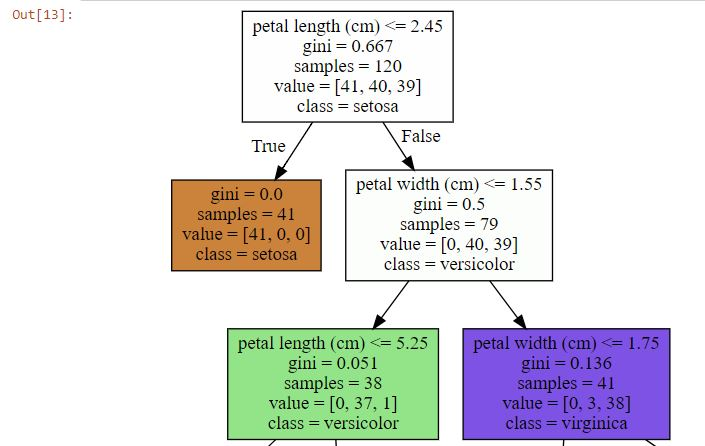

> - petal length <= 2.45 와 같은 Feature 조건을 가진다는 의미이고, 이러한 조건이 없으면 Leaf node 임
> - gini : value=[41, 40, 39] 에 대한 데이터 분포 gini 계수 의미
> - samples : petal length <= 2.45 규칙에 해당하는 데이터 건수
> - value : Label정답 값에 기반한 데이터 건수 의미; Label 은 0, 1, 2 을 가지므로, value=[41, 40, 39] 는 각각 0, 1, 2 Label 에 대한 데이터 건수; 즉, 여기서는 Label 0, Setosa 에 해당하는 데이터 41개로 해석
> - class : value=[41, 40, 39] 리스트 중에서 가장 많은 데이터 건수를 가진 결정값 의미

# 모델링 관련 내용

## DecisionTree Hyperparameter

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### 주요 파라미터

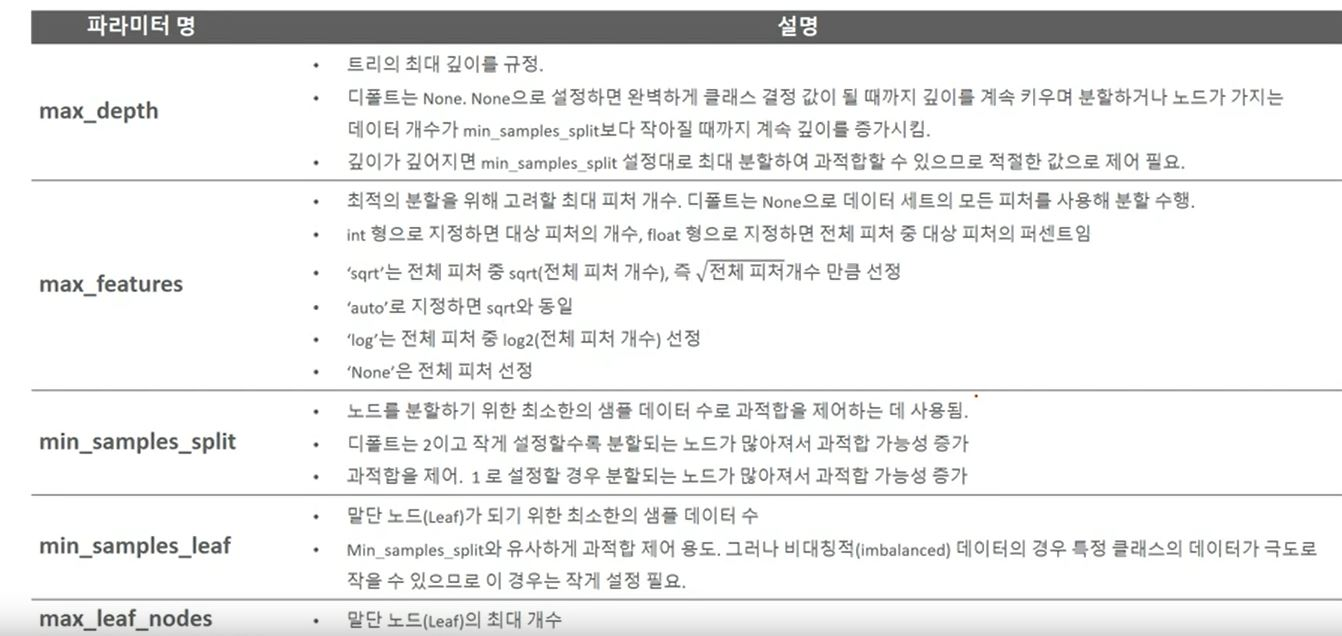

#### max_depth

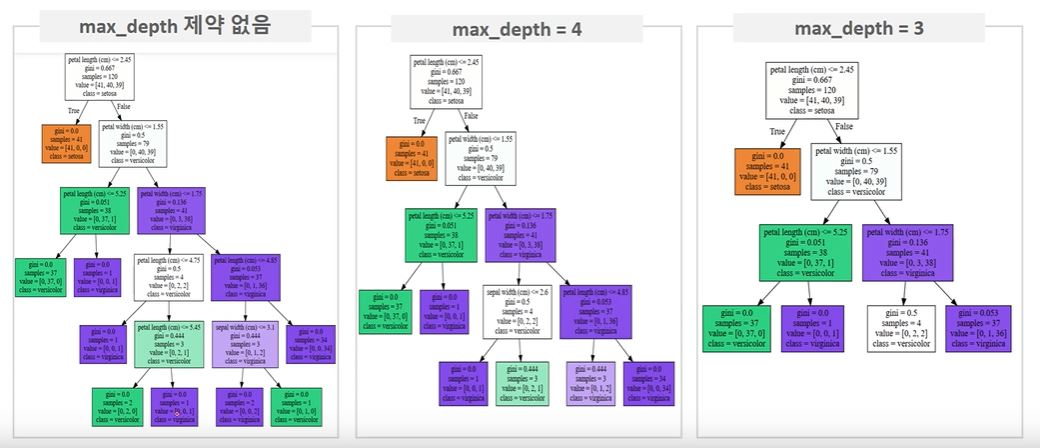


#### max_sample_split ( split 할 Samples 개수의 최대 경계치를 정의 )

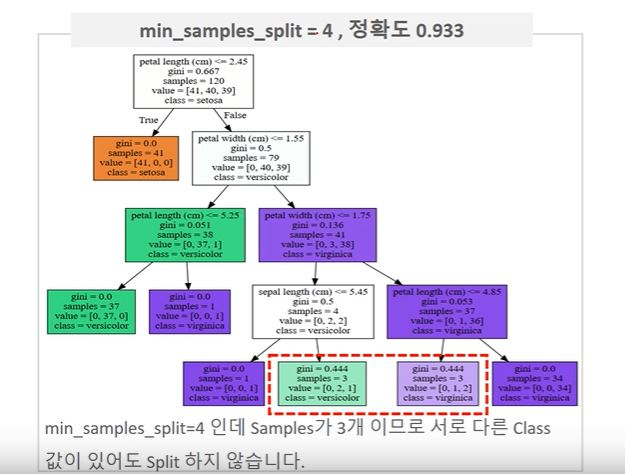


#### min_sample_leaf ( Leaf node 할 Samples 개수의 최소 경계치를 정의 )

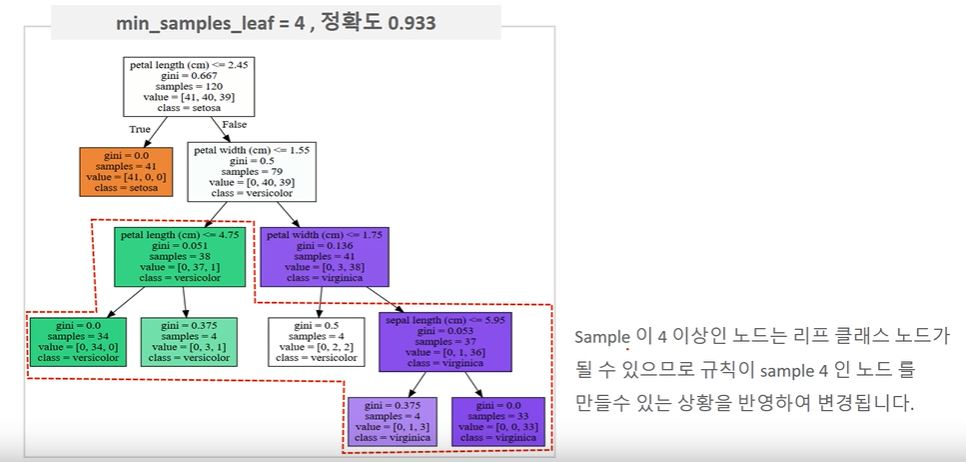

 

### Feature 선택 중요도 정보

- DecisionClassifier 객체에서 `feature_importances_` 를 통해 학습/예측을 위해 중요한 Feature를 선택할 수 있는 정보를 제공함

Feature importances:
[0.    0.    0.558 0.442]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<AxesSubplot:>

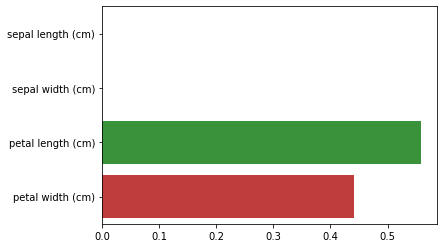

In [61]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print(f"Feature importances:\n{np.round(dt_clf.feature_importances_, 3)}")

# feature별 importance 매핑
for name, value in zip(iris.feature_names , dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris.feature_names)

In [62]:
y_predict = dt_clf.predict(X_train)
from sklearn.metrics import accuracy_score
print(f"accuracy_score : {accuracy_score(y_train, y_predict)}")

accuracy_score : 0.975


In [63]:
y_predict = dt_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"accuracy_score : {accuracy_score(y_test, y_predict)}")

accuracy_score : 0.9333333333333333


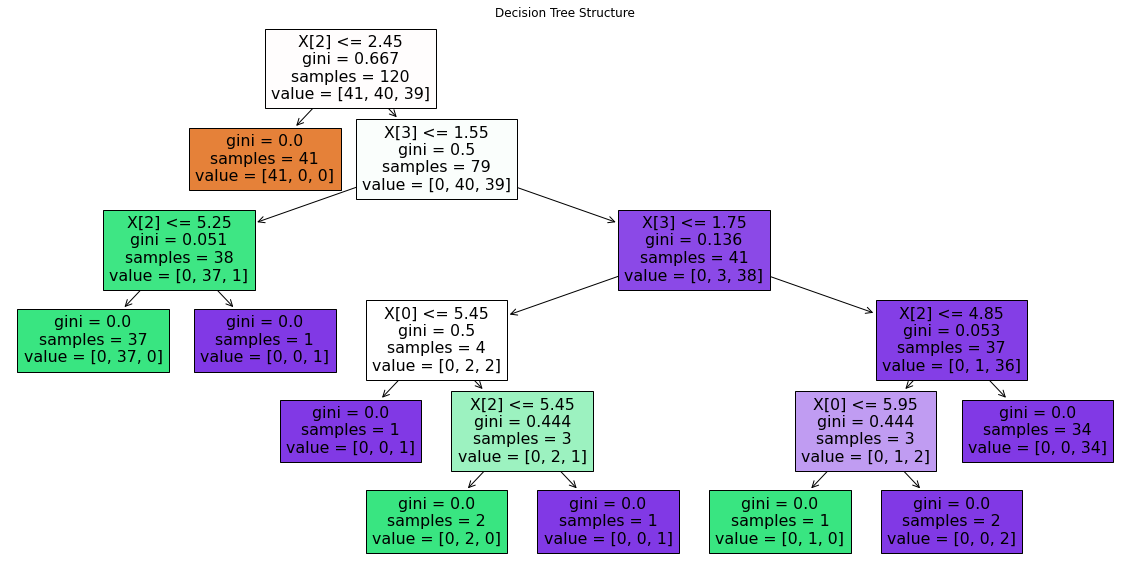

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt
import numpy as np

# 분류 알고리즘 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=None)

# DecisionTreeClassifier 학습 수행
dt_clf.fit(X_train, y_train)

# 1. 결정 트리 구조 시각화
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True)
plt.title("Decision Tree Structure")
plt.show()

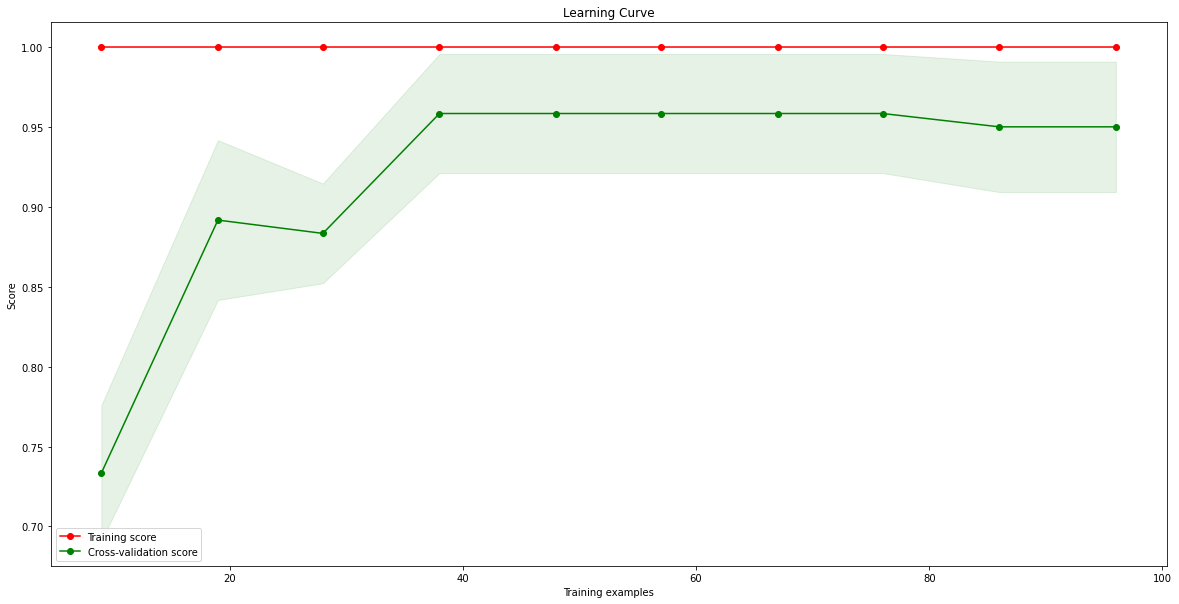

In [68]:

# 2. 학습 곡선 그리기
def plot_learning_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(20,10))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

plot_learning_curve(dt_clf, X_train, y_train)

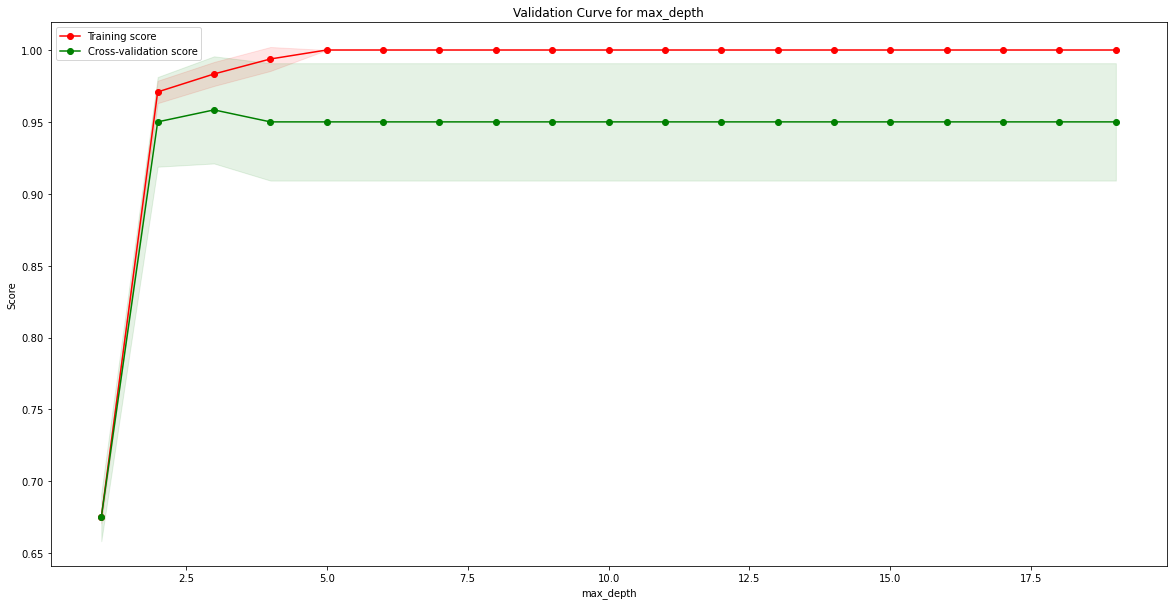

In [69]:
# 3. 검증 곡선 그리기
def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(20,10))
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Validation Curve for {param_name}")
    plt.show()

param_range = np.arange(1, 20)
plot_validation_curve(dt_clf, X_train, y_train, param_name="max_depth", param_range=param_range)

In [83]:
# 4. 결정 경계 시각화 (2차원 데이터에 유용)
def plot_decision_boundary(clf, X, y, ax):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title("Decision Boundary")


# 만약 X_train이 2차원 특징을 가진다면:
if X_train.shape[1] == 2:
    fig, ax = plt.subplots()
    plot_decision_boundary(dt_clf, X_train, y_train, ax)
    plt.show()
else:
    print("결정 경계 시각화는 2차원 데이터에만 유효합니다.")

결정 경계 시각화는 2차원 데이터에만 유효합니다.


### DecisionTree Overfitting

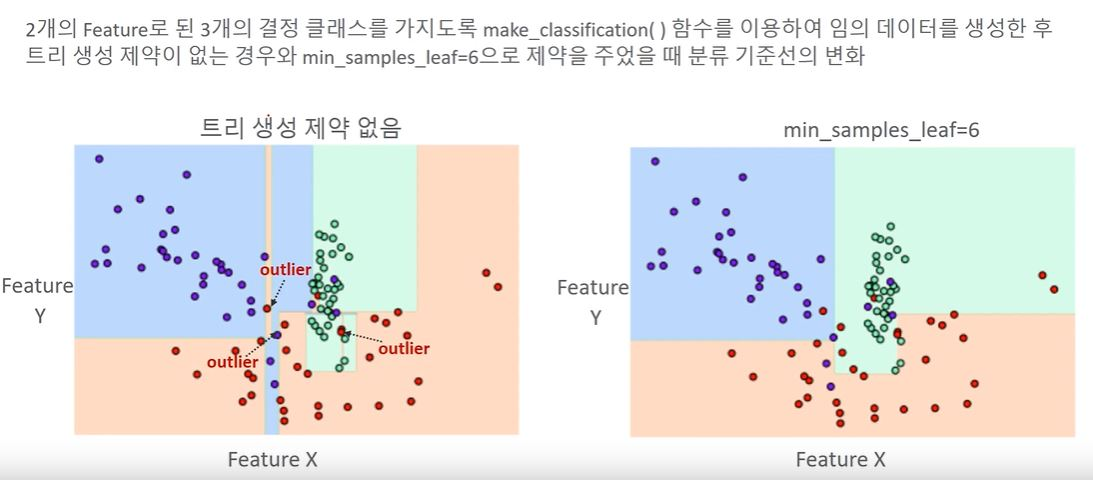


** ----------------------------------------------**

### Variance vs Bias

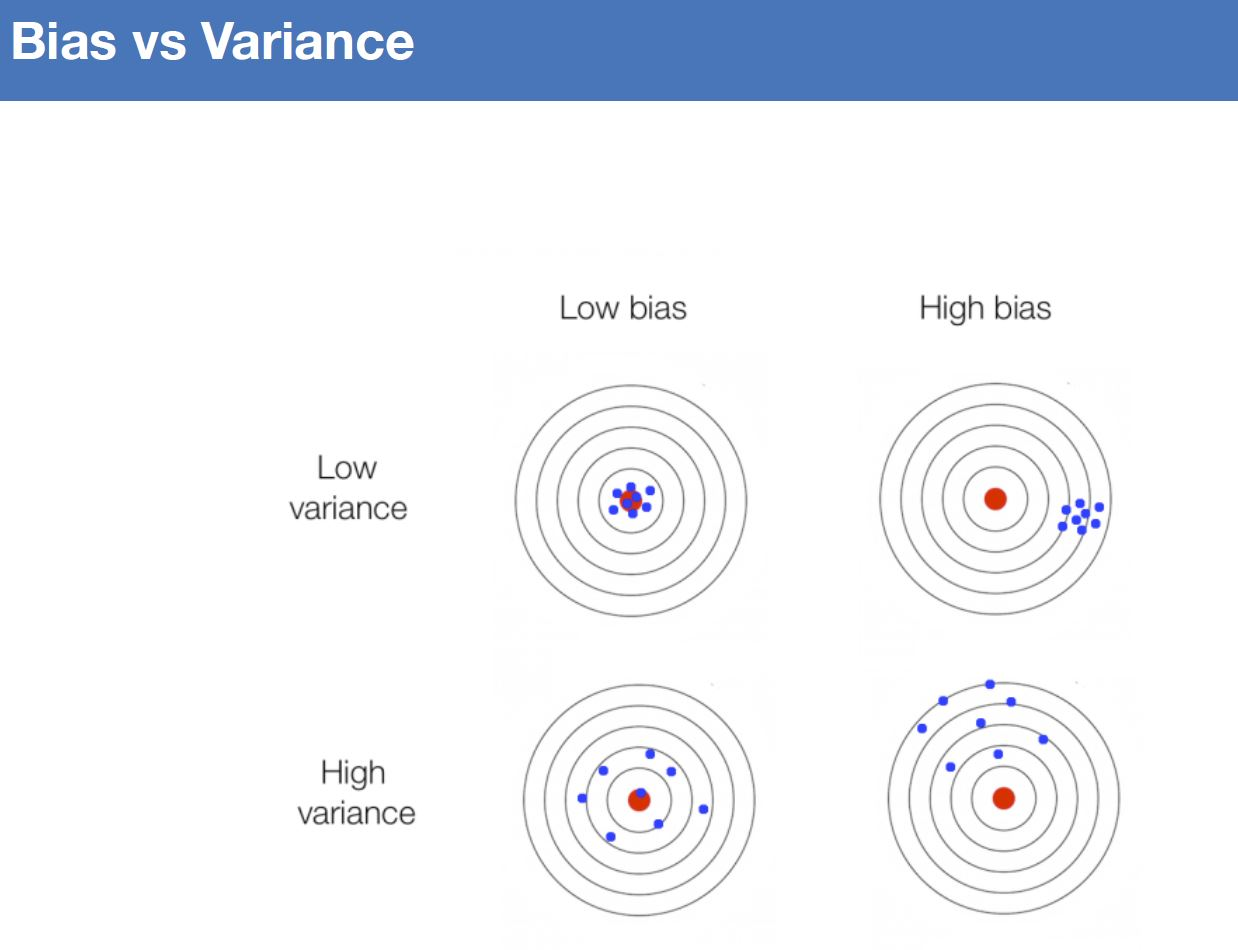

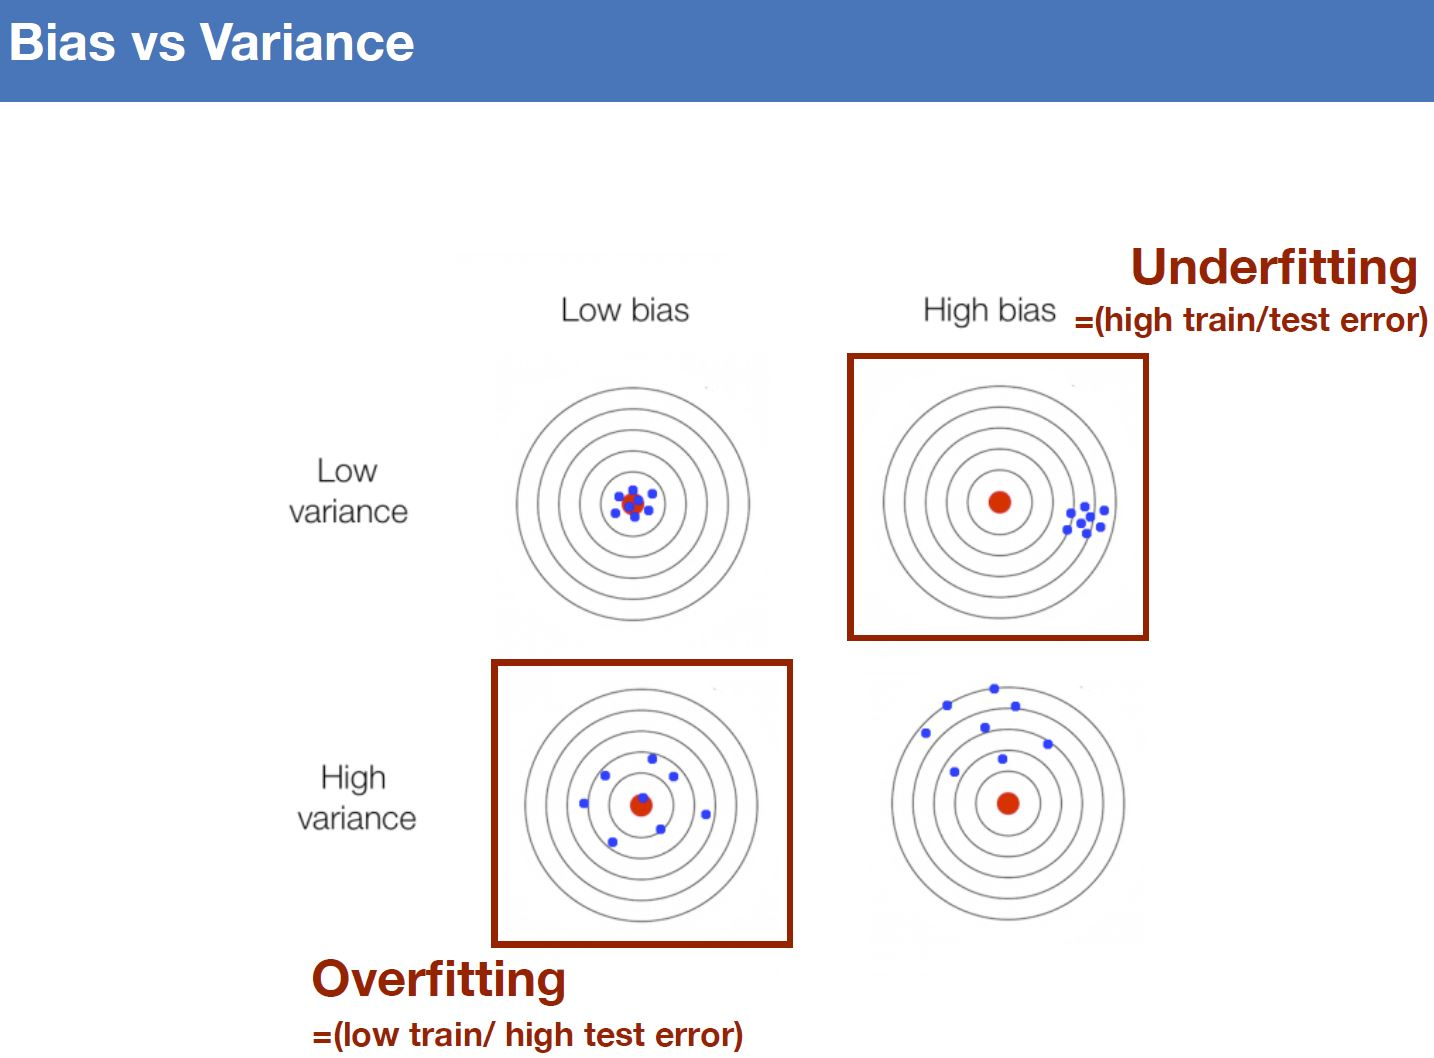

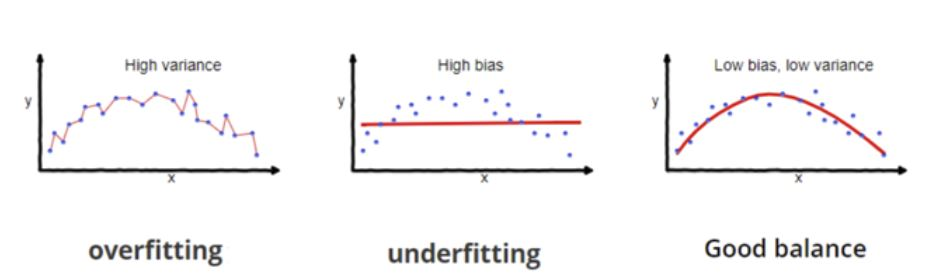



## Decision Tree 모델 시각화(Visualization) - II

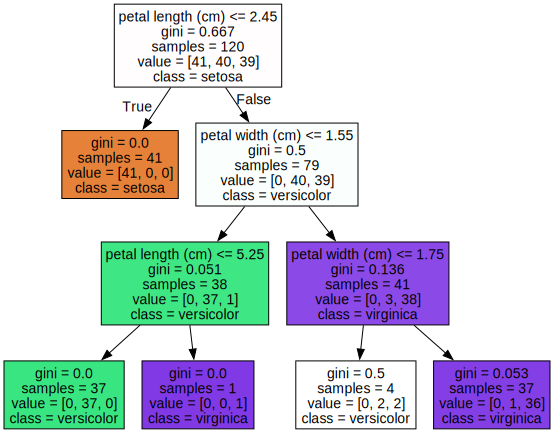

In [32]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                class_names=iris.target_names , 
                                feature_names = iris.feature_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

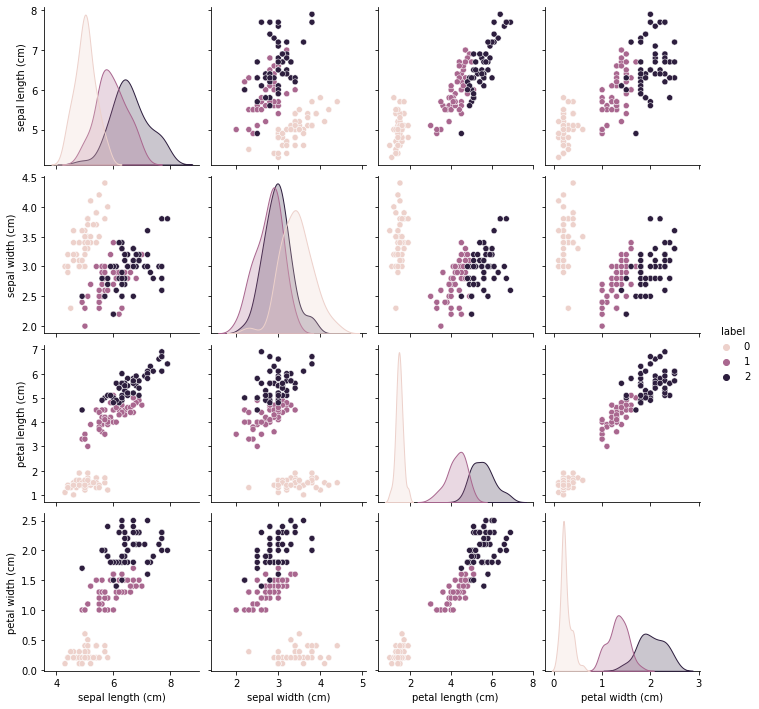

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(vars=df_iris.columns[:-1], hue="label", data=df_iris)
plt.show()

[Text(0.375, 0.875, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.25, 0.375, 'X[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'X[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.875, 0.125, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

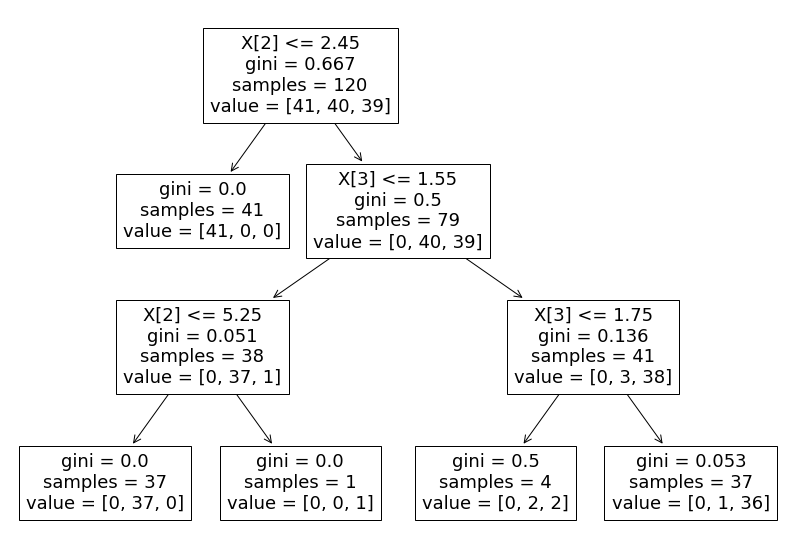

In [34]:
plt.figure(figsize=(14, 10))

tree.plot_tree(dt_clf)

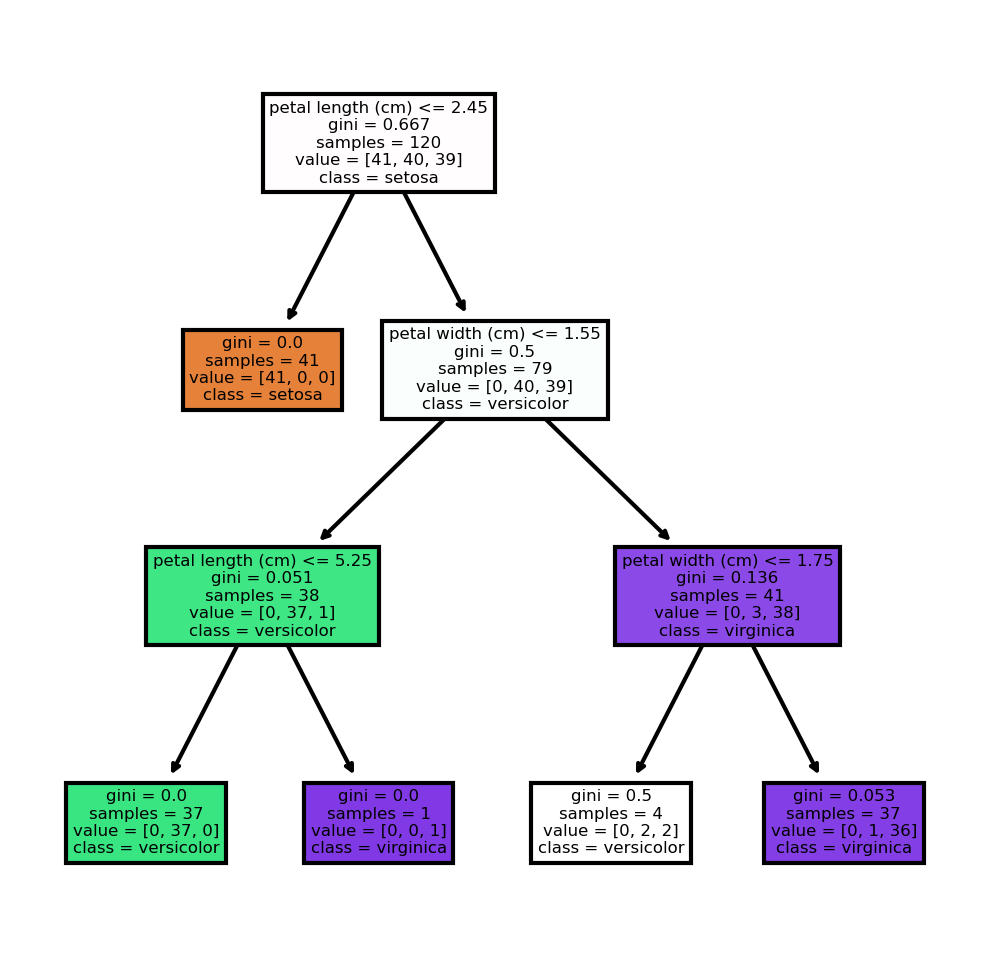

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(dt_clf,
               class_names=iris.target_names , 
               feature_names = iris.feature_names,
               filled = True);
fig.savefig('data/dt_tree.png')